#### José Randson da Cunha
#### jrandson@gmail.com
#### (11) 99921-7825

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_points.txt', sep='\t')
del df['Unnamed: 0']
print(df.shape)
df.head()

(10000, 4)


,x,y,z,label
0,326.488285,188.988808,-312.205307,0.0
1,-314.287214,307.276723,-179.037412,1.0
2,-328.208910,181.627758,446.311062,1.0
3,-148.658890,147.027947,-27.477959,1.0
4,-467.065931,250.467651,-306.475330,1.0


In [3]:
#As we can see the dataset is reasonble balanced

label_1 = df[df['label'] == 1].shape[0]
label_0 = df[df['label'] == 0].shape[0]

print("Num lables equal to 0: {}".format(label_0))
print("Num lables equal to 1: {}".format(label_1))


Num lables equal to 0: 4973
Num lables equal to 1: 5027


In [4]:
#checking if there is some null values. It seems ok :)
df.isnull().sum()

x        0
y        0
z        0
label    0
dtype: int64

In [5]:
#separating the dataset in features and labels

X = df[df.columns[:-1]].values
print(X.shape)
print(X[:10])

y = df[df.columns[-1]].values
print(y.shape)
print(y[:10])


(10000, 3)
[[ 326.48828486  188.98880779 -312.20530651]
 [-314.28721419  307.27672314 -179.03741228]
 [-328.20891006  181.62775751  446.3110616 ]
 [-148.65889024  147.0279472   -27.47795857]
 [-467.06593089  250.46765084 -306.47533015]
 [ -23.86398511  -44.08456548 -276.79628017]
 [   3.66081229 -252.59997325 -445.04407117]
 [ 405.40647952  124.73459546  482.31767834]
 [-467.87720628  -49.02204676 -340.05609429]
 [ 343.45773737  142.9104283    10.56313316]]
(10000,)
[0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


spliting the dataset into train and test set
the dataset will be devieded between 70% for training and 30% for test
Here I'm using the the stratify param to matain the propotionality between the labels in the train and test parts

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
print("{} samples for training".format(X_train.shape[0]))
print("{} samples for testing".format(X_test.shape[0]))


7000 samples for training
3000 samples for testing


In [7]:
from sklearn.linear_model import LogisticRegression

#instanciating an object model for logistic regression
logistic_model = LogisticRegression()

#training the model
logistic_model.fit(X_train, y_train)

/home/randson/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
logistic_model.coef_

array([[-7.57471418e-05,  1.01652414e-04, -9.44718440e-05]])

Now, I'm using the following metric to evaluate the model I just trained.

The main metrics are accuracy, precision,recall and f1 score and they are computed as follows:

<b>Accuracy </b> Is the total of predictions for both labels that are correct divided by the total of predictions. There is not much to say about it.

<b>Recall</b> is a metric that defines the sensitivity of the model. It is computed dividing the total of correct positive predictions by the total of real true positives inside the sample considered.

<b>Precision</b> is a bit different of recall. It is defined as number of correct predictions as positives divided by the total number of predictions made as positives, correct or not. 

<b>f1 score </b> score is the armonic mean between precisiona and recall



In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = logistic_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1 score: {}".format(f1))

Accuracy: 0.443
Precision: 0.454646633277685
recall: 0.5417771883289124
f1 score: 0.4944024205748865


Another important way to find out about the effectivenes of the model is to plot the Confusion matrix. The confusion matrix is a performance measurement of the model in which we can easily see quantitatively how our model 
has correctly or wrongly made it predictions during the test step.

This matrix is compounded by the combination of 4 differents values, that are the predicted labels and the actual labels:

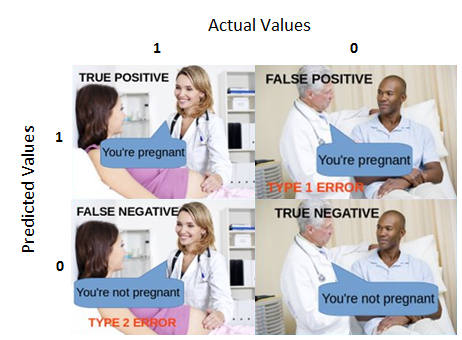

We can see if our model is good if we notice that our confusion matrix has a predominant principal diagonal, which means our model can address correclty both labels 0 or 1 of our dataset as being True positives and true negatives.

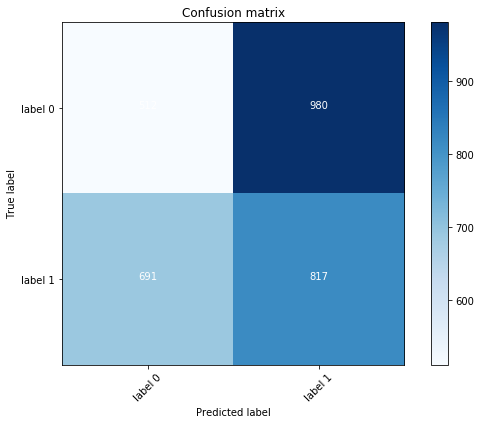

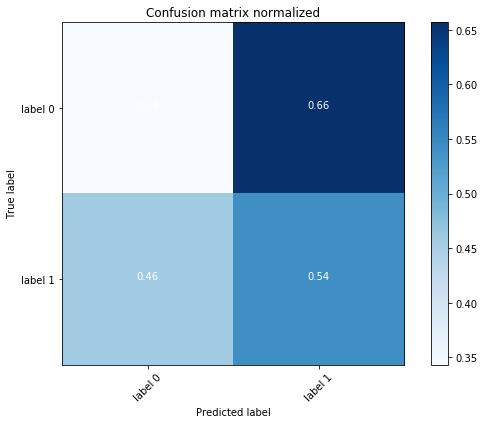

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,6))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

classes = ['label 0', 'label 1']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes,normalize=False, title='Confusion matrix')

plot_confusion_matrix(cnf_matrix, classes,normalize=True, title='Confusion matrix normalized')

cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


Finally, another metric used to verify this model is called ROC Curv, which is a measurement of how non-radom are the predictions of our model. In this curve we compare the effectivenes of ur model with a total random prediction, represented by a diagonal line. How much further the line of our model is of this line (the orange line bellow) better our model. That means our model actually is doing correct predictions that are not just random guessing.

Automatically created module for IPython interactive environment


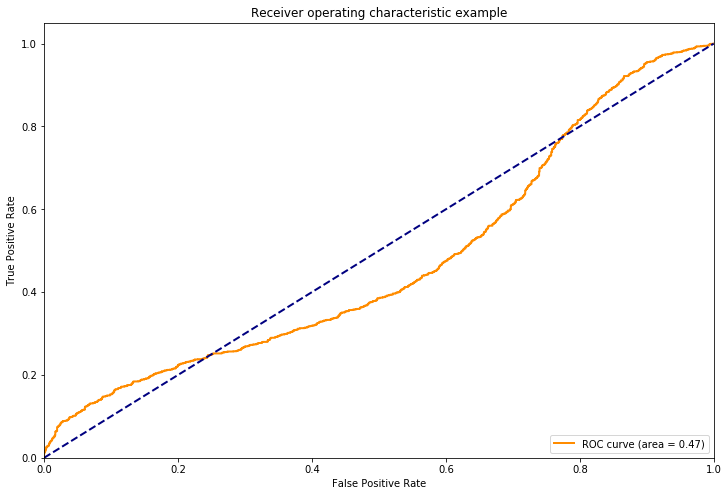

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y_score = logistic_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Considering the all metrics computed for this model we can conclude that this model is bad. the metrics Accuracy: 0.55, Precision: 0.54, recall: 0.60 and f1 score: 0.57 are all low. Moreover, our confusion matrix doesn't show a dominant principal diagonal, which means our model was not able to generalize well the dataset. Finally, the ROC curv of the model if very close to the random line, which means our model is a quite random.

Perharps we have got this result due to the fact of the dataset has a non linear carachterict, which could not be assimilated by our linear model, which is capable to learn only linear distributions.

In the nect notebook, We will solve this proble with Neural Network, which is more pwerfull and more suteble for this dataset